In [1]:
import os
import numpy as np
import seaborn as sns
from pymbar import BAR
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from glob import glob
import pickle
from simtk.openmm import unit
import bz2
from freeenergyframework import plotting, stats
import pandas as pd
import json
import tqdm
from openmmtools.constants import kB
temperature = 300.0 * unit.kelvin
kT = kB * temperature

In [2]:
with bz2.BZ2File('../../data/work-13416.pkl.bz2', 'r') as infile:
    work = pickle.load(infile)

In [3]:
work.replace([np.inf, -np.inf], np.nan)
work = work.dropna()

def _strip_outliers(w,n_devs=100):
    w = [x for x in w if np.abs(x) < 10**4]
    mean = np.mean(w)
    std = np.std(w)
    good_w = [x for x in w if np.abs(x-mean) < n_devs*std]
    return np.asarray(good_w)

In [4]:
with open('../../json-files/13416/backtesting.json', 'r') as f:
    details = json.load(f)

In [5]:
projects = {
    'complex' : 'PROJ13416',
    'solvent' : 'PROJ13417'}

import time
plotting = False

def _get_works(df,run,project,GEN=None):
    works = df[(df['RUN']==run)]
    
    if GEN:
        works = works[works['GEN']==GEN]

    f = works[works['PROJ']==project].forward_work
    r = works[works['PROJ']==project].reverse_work   
    return f, r


for d in tqdm.tqdm(details.values()):
    RUN = d['directory']
    if plotting:
        fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
    for i, phase in enumerate(projects.keys()):
        if plotting:
            axes[i].set_title(phase)

        f_works_0, r_works_0 = _get_works(work,RUN,projects[phase],GEN='GEN0')
        f_works_0 = _strip_outliers(f_works_0)       
        r_works_0 = _strip_outliers(r_works_0)
        if any([True for x in [f_works_0, r_works_0] if len(x) < 1]):
            print(f'Cant calculate {RUN} {phase} GEN0')
        else:
            d[f'{phase}_fes_GEN0'] = BAR(f_works_0, r_works_0)

        f_works_1, r_works_1 = _get_works(work,RUN,projects[phase],GEN='GEN1')
        f_works_1 = _strip_outliers(f_works_1)       
        r_works_1 = _strip_outliers(r_works_1)
        if any([True for x in [f_works_1, r_works_1] if len(x) < 1]):
            print(f'Cant calculate {RUN} {phase} GEN1')
        else:
            d[f'{phase}_fes_GEN1'] = BAR(np.asarray(f_works_1),np.asarray(r_works_1))  

        f_works = np.append(f_works_0,f_works_1)
        r_works = np.append(r_works_0,r_works_1)
#         if len(f_works) < 100:
#             continue
#         if len(r_works) < 100:
#             continue
        if plotting:
            sns.kdeplot(f_works,shade=True,color='cornflowerblue',ax=axes[i])
            sns.rugplot(f_works,ax=axes[i],color='cornflowerblue',alpha=0.5,label=f'forward : N={len(f_works)}')
            sns.rugplot(f_works,ax=axes[i],color='darkblue',label=f'forward (gen0) : N={len(f_works)}')
            sns.rugplot([-x for x in r_works],ax=axes[i],color='mediumvioletred',label=f'reverse (gen0) : N={len(r_works)}')
            sns.kdeplot([-x for x in r_works],shade=True,color='hotpink',ax=axes[i])
            sns.rugplot([-x for x in r_works],ax=axes[i],color='hotpink',alpha=0.5,label=f'reverse : N={len(r_works)}')

        if any([True for x in [f_works, r_works] if len(x) < 20]):
            print(f'Cant calculate {RUN} {phase}')
        else:
            d[f'{phase}_fes'] = BAR(f_works, r_works)
            d[f'n_{phase}'] = len(f_works) + len(r_works)
              
        
    if plotting:    
        fig.suptitle(f"{RUN}: {d['protein'].split('_')[0]} {d['start']}-{d['end']}", fontsize=16)
        fig.subplots_adjust(top=0.9,wspace=0.15)
        axes[0].legend()
        axes[1].legend()
        plt.show()

 13%|█▎        | 56/420 [00:02<00:13, 26.04it/s]/Users/brucemah/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning:

Mean of empty slice.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

/Users/brucemah/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/brucemah/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning:

invalid value encountered in true_divide

/Users/brucemah/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars

 15%|█▍        | 62/420 [00:02<00:13, 26.15it/s]

Cant calculate RUN58 complex GEN0
Cant calculate RUN58 complex GEN1
Cant calculate RUN58 complex
Cant calculate RUN58 solvent GEN0
Cant calculate RUN58 solvent GEN1
Cant calculate RUN58 solvent
Cant calculate RUN60 complex GEN0
Cant calculate RUN60 complex GEN1
Cant calculate RUN60 complex
Cant calculate RUN60 solvent GEN0
Cant calculate RUN60 solvent GEN1
Cant calculate RUN60 solvent
Cant calculate RUN62 complex GEN0
Cant calculate RUN62 complex GEN1
Cant calculate RUN62 complex
Cant calculate RUN62 solvent GEN0
Cant calculate RUN62 solvent GEN1
Cant calculate RUN62 solvent
Cant calculate RUN64 complex GEN0
Cant calculate RUN64 complex GEN1
Cant calculate RUN64 complex
Cant calculate RUN64 solvent GEN0
Cant calculate RUN64 solvent GEN1
Cant calculate RUN64 solvent


 16%|█▋        | 69/420 [00:02<00:12, 27.32it/s]

Cant calculate RUN66 complex GEN0
Cant calculate RUN66 complex GEN1
Cant calculate RUN66 complex
Cant calculate RUN66 solvent GEN0
Cant calculate RUN66 solvent GEN1
Cant calculate RUN66 solvent
Cant calculate RUN70 complex GEN0
Cant calculate RUN70 complex GEN1
Cant calculate RUN70 complex
Cant calculate RUN70 solvent GEN0
Cant calculate RUN70 solvent GEN1
Cant calculate RUN70 solvent


 19%|█▊        | 78/420 [00:02<00:12, 27.05it/s]

Cant calculate RUN72 complex GEN0
Cant calculate RUN72 complex GEN1
Cant calculate RUN72 complex
Cant calculate RUN72 solvent GEN0
Cant calculate RUN72 solvent GEN1
Cant calculate RUN72 solvent
Cant calculate RUN76 complex GEN0
Cant calculate RUN76 complex GEN1
Cant calculate RUN76 complex
Cant calculate RUN76 solvent GEN0
Cant calculate RUN76 solvent GEN1
Cant calculate RUN76 solvent


 34%|███▍      | 144/420 [00:05<00:10, 26.29it/s]

Cant calculate RUN138 complex GEN0
Cant calculate RUN138 complex GEN1
Cant calculate RUN138 complex
Cant calculate RUN138 solvent GEN0
Cant calculate RUN138 solvent GEN1
Cant calculate RUN138 solvent


 51%|█████▏    | 216/420 [00:08<00:07, 26.43it/s]

Cant calculate RUN210 complex GEN0
Cant calculate RUN210 complex GEN1
Cant calculate RUN210 complex
Cant calculate RUN210 solvent GEN0
Cant calculate RUN210 solvent GEN1
Cant calculate RUN210 solvent
Cant calculate RUN211 complex GEN1
Cant calculate RUN211 solvent GEN1
Cant calculate RUN212 complex GEN1
Cant calculate RUN212 solvent GEN1
Cant calculate RUN213 complex GEN1
Cant calculate RUN213 solvent GEN1
Cant calculate RUN214 complex GEN1
Cant calculate RUN214 solvent GEN1
Cant calculate RUN215 complex GEN1
Cant calculate RUN215 solvent GEN1


 52%|█████▏    | 219/420 [00:08<00:07, 26.72it/s]

Cant calculate RUN216 complex GEN1
Cant calculate RUN216 solvent GEN1
Cant calculate RUN217 complex GEN1
Cant calculate RUN217 solvent GEN1
Cant calculate RUN218 complex GEN1
Cant calculate RUN218 solvent GEN1
Cant calculate RUN219 complex GEN1
Cant calculate RUN219 solvent GEN1
Cant calculate RUN220 complex GEN1
Cant calculate RUN220 solvent GEN1
Cant calculate RUN221 complex GEN1
Cant calculate RUN221 solvent GEN1


 54%|█████▍    | 228/420 [00:08<00:07, 27.30it/s]

Cant calculate RUN222 complex GEN1
Cant calculate RUN222 solvent GEN1
Cant calculate RUN222 solvent
Cant calculate RUN223 complex GEN1
Cant calculate RUN223 solvent GEN1
Cant calculate RUN224 complex GEN1
Cant calculate RUN224 solvent GEN1
Cant calculate RUN225 complex GEN1
Cant calculate RUN225 solvent GEN1
Cant calculate RUN226 complex GEN1
Cant calculate RUN226 solvent GEN1
Cant calculate RUN227 complex GEN1
Cant calculate RUN227 solvent GEN1


 55%|█████▌    | 231/420 [00:08<00:07, 26.80it/s]

Cant calculate RUN228 complex GEN1
Cant calculate RUN228 solvent GEN1
Cant calculate RUN229 complex GEN1
Cant calculate RUN229 solvent GEN1
Cant calculate RUN230 complex GEN1
Cant calculate RUN230 solvent GEN1
Cant calculate RUN231 complex GEN1
Cant calculate RUN231 solvent GEN1
Cant calculate RUN231 solvent
Cant calculate RUN232 complex GEN1
Cant calculate RUN232 solvent GEN1
Cant calculate RUN233 complex GEN1


 56%|█████▋    | 237/420 [00:09<00:06, 26.65it/s]

Cant calculate RUN233 solvent GEN1
Cant calculate RUN234 complex GEN1
Cant calculate RUN234 solvent GEN1
Cant calculate RUN235 complex GEN1
Cant calculate RUN235 solvent GEN1
Cant calculate RUN236 complex GEN1
Cant calculate RUN236 solvent GEN1
Cant calculate RUN237 complex GEN1
Cant calculate RUN237 solvent GEN1
Cant calculate RUN238 complex GEN1
Cant calculate RUN238 solvent GEN1


 58%|█████▊    | 243/420 [00:09<00:06, 27.04it/s]

Cant calculate RUN239 complex GEN1
Cant calculate RUN239 solvent GEN1
Cant calculate RUN240 complex GEN1
Cant calculate RUN240 solvent GEN1
Cant calculate RUN241 complex GEN1
Cant calculate RUN241 solvent GEN1
Cant calculate RUN242 complex GEN1
Cant calculate RUN242 solvent GEN1
Cant calculate RUN243 complex GEN1
Cant calculate RUN243 solvent GEN1
Cant calculate RUN244 complex GEN1
Cant calculate RUN244 solvent GEN1
Cant calculate RUN245 complex GEN1


 59%|█████▉    | 249/420 [00:09<00:06, 26.96it/s]

Cant calculate RUN245 solvent GEN1
Cant calculate RUN246 complex GEN1
Cant calculate RUN246 solvent GEN1
Cant calculate RUN247 complex GEN1
Cant calculate RUN247 solvent GEN1
Cant calculate RUN248 complex GEN1
Cant calculate RUN248 solvent GEN1
Cant calculate RUN249 complex GEN1
Cant calculate RUN249 solvent GEN1
Cant calculate RUN250 complex GEN1
Cant calculate RUN250 solvent GEN1


 61%|██████    | 255/420 [00:09<00:06, 27.33it/s]

Cant calculate RUN251 complex GEN1
Cant calculate RUN251 solvent GEN1
Cant calculate RUN252 complex GEN1
Cant calculate RUN252 solvent GEN1
Cant calculate RUN253 complex GEN1
Cant calculate RUN253 solvent GEN1
Cant calculate RUN254 complex GEN1
Cant calculate RUN254 solvent GEN1
Cant calculate RUN255 complex GEN1
Cant calculate RUN255 solvent GEN1
Cant calculate RUN256 complex GEN1
Cant calculate RUN256 solvent GEN1
Cant calculate RUN257 complex GEN1


 62%|██████▏   | 261/420 [00:10<00:05, 27.00it/s]

Cant calculate RUN257 solvent GEN1
Cant calculate RUN258 complex GEN1
Cant calculate RUN258 solvent GEN1
Cant calculate RUN259 complex GEN1
Cant calculate RUN259 solvent GEN1
Cant calculate RUN260 complex GEN1
Cant calculate RUN260 solvent GEN1
Cant calculate RUN261 complex GEN1
Cant calculate RUN261 solvent GEN1
Cant calculate RUN262 complex GEN1
Cant calculate RUN262 solvent GEN1


 64%|██████▎   | 267/420 [00:10<00:05, 26.94it/s]

Cant calculate RUN263 complex GEN1
Cant calculate RUN263 solvent GEN1
Cant calculate RUN264 complex GEN1
Cant calculate RUN264 solvent GEN1
Cant calculate RUN265 complex GEN1
Cant calculate RUN265 solvent GEN1
Cant calculate RUN266 complex GEN1
Cant calculate RUN266 solvent GEN1
Cant calculate RUN267 complex GEN1
Cant calculate RUN267 solvent GEN1
Cant calculate RUN268 complex GEN0
Cant calculate RUN268 complex GEN1
Cant calculate RUN268 complex
Cant calculate RUN268 solvent GEN0
Cant calculate RUN268 solvent GEN1
Cant calculate RUN268 solvent


 65%|██████▌   | 273/420 [00:10<00:05, 28.17it/s]

Cant calculate RUN269 complex GEN1
Cant calculate RUN269 solvent GEN1
Cant calculate RUN270 complex GEN0
Cant calculate RUN270 complex GEN1
Cant calculate RUN270 complex
Cant calculate RUN270 solvent GEN0
Cant calculate RUN270 solvent GEN1
Cant calculate RUN270 solvent
Cant calculate RUN271 complex GEN1
Cant calculate RUN271 solvent GEN1
Cant calculate RUN272 complex GEN0
Cant calculate RUN272 complex GEN1
Cant calculate RUN272 complex
Cant calculate RUN272 solvent GEN0
Cant calculate RUN272 solvent GEN1
Cant calculate RUN272 solvent
Cant calculate RUN273 complex GEN1
Cant calculate RUN273 solvent GEN1
Cant calculate RUN274 complex GEN0
Cant calculate RUN274 complex GEN1
Cant calculate RUN274 complex
Cant calculate RUN274 solvent GEN0
Cant calculate RUN274 solvent GEN1
Cant calculate RUN274 solvent


 66%|██████▋   | 279/420 [00:10<00:04, 28.33it/s]

Cant calculate RUN275 complex GEN1
Cant calculate RUN275 solvent GEN1
Cant calculate RUN276 complex GEN0
Cant calculate RUN276 complex GEN1
Cant calculate RUN276 complex
Cant calculate RUN276 solvent GEN0
Cant calculate RUN276 solvent GEN1
Cant calculate RUN276 solvent
Cant calculate RUN277 complex GEN1
Cant calculate RUN277 solvent GEN1
Cant calculate RUN278 complex GEN1
Cant calculate RUN278 solvent GEN1
Cant calculate RUN279 complex GEN1
Cant calculate RUN279 solvent GEN1
Cant calculate RUN280 complex GEN0
Cant calculate RUN280 complex GEN1
Cant calculate RUN280 complex
Cant calculate RUN280 solvent GEN0
Cant calculate RUN280 solvent GEN1
Cant calculate RUN280 solvent
Cant calculate RUN281 complex GEN1


 68%|██████▊   | 285/420 [00:10<00:04, 28.65it/s]

Cant calculate RUN281 solvent GEN1
Cant calculate RUN282 complex GEN0
Cant calculate RUN282 complex GEN1
Cant calculate RUN282 complex
Cant calculate RUN282 solvent GEN0
Cant calculate RUN282 solvent GEN1
Cant calculate RUN282 solvent
Cant calculate RUN283 complex GEN1
Cant calculate RUN283 solvent GEN1
Cant calculate RUN284 complex GEN1
Cant calculate RUN284 solvent GEN1
Cant calculate RUN285 complex GEN1
Cant calculate RUN285 solvent GEN1
Cant calculate RUN286 complex GEN0
Cant calculate RUN286 complex GEN1
Cant calculate RUN286 complex
Cant calculate RUN286 solvent GEN0
Cant calculate RUN286 solvent GEN1
Cant calculate RUN286 solvent
Cant calculate RUN287 complex GEN1


 69%|██████▉   | 291/420 [00:11<00:04, 26.59it/s]

Cant calculate RUN287 solvent GEN1
Cant calculate RUN288 complex GEN1
Cant calculate RUN288 solvent GEN1
Cant calculate RUN289 complex GEN1
Cant calculate RUN289 solvent GEN1
Cant calculate RUN290 complex GEN1
Cant calculate RUN290 solvent GEN1
Cant calculate RUN291 complex GEN1
Cant calculate RUN291 solvent GEN1
Cant calculate RUN292 complex GEN1
Cant calculate RUN292 solvent GEN1


 71%|███████   | 297/420 [00:11<00:04, 25.45it/s]

Cant calculate RUN293 complex GEN1
Cant calculate RUN293 solvent GEN1
Cant calculate RUN294 complex GEN1
Cant calculate RUN294 solvent GEN1
Cant calculate RUN295 complex GEN1
Cant calculate RUN295 solvent GEN1
Cant calculate RUN296 complex GEN1
Cant calculate RUN296 solvent GEN1
Cant calculate RUN297 complex GEN1
Cant calculate RUN297 solvent GEN1
Cant calculate RUN298 complex GEN1


 72%|███████▏  | 303/420 [00:11<00:04, 25.07it/s]

Cant calculate RUN298 solvent GEN1
Cant calculate RUN299 complex GEN1
Cant calculate RUN299 solvent GEN1
Cant calculate RUN300 complex GEN1
Cant calculate RUN300 solvent GEN1
Cant calculate RUN301 complex GEN1
Cant calculate RUN301 solvent GEN1
Cant calculate RUN302 complex GEN1
Cant calculate RUN302 solvent GEN1
Cant calculate RUN303 complex GEN1
Cant calculate RUN303 solvent GEN1
Cant calculate RUN304 complex GEN1


 74%|███████▎  | 309/420 [00:11<00:04, 24.42it/s]

Cant calculate RUN304 solvent GEN1
Cant calculate RUN305 complex GEN1
Cant calculate RUN305 solvent GEN1
Cant calculate RUN306 complex GEN1
Cant calculate RUN306 solvent GEN1
Cant calculate RUN307 complex GEN1
Cant calculate RUN307 solvent GEN1
Cant calculate RUN308 complex GEN1
Cant calculate RUN308 solvent GEN1
Cant calculate RUN309 complex GEN1


 74%|███████▍  | 312/420 [00:12<00:04, 23.21it/s]

Cant calculate RUN309 solvent GEN1
Cant calculate RUN310 complex GEN1
Cant calculate RUN310 solvent GEN1
Cant calculate RUN311 complex GEN1
Cant calculate RUN311 solvent GEN1
Cant calculate RUN312 complex GEN1
Cant calculate RUN312 solvent GEN1
Cant calculate RUN313 complex GEN1
Cant calculate RUN313 solvent GEN1


 76%|███████▌  | 318/420 [00:12<00:04, 22.71it/s]

Cant calculate RUN314 complex GEN1
Cant calculate RUN314 solvent GEN1
Cant calculate RUN315 complex GEN1
Cant calculate RUN315 solvent GEN1
Cant calculate RUN316 complex GEN1
Cant calculate RUN316 solvent GEN1
Cant calculate RUN317 complex GEN1
Cant calculate RUN317 solvent GEN1
Cant calculate RUN318 complex GEN1
Cant calculate RUN318 solvent GEN1


 76%|███████▋  | 321/420 [00:12<00:04, 23.36it/s]

Cant calculate RUN319 complex GEN1
Cant calculate RUN319 solvent GEN1
Cant calculate RUN320 complex GEN1
Cant calculate RUN320 solvent GEN1
Cant calculate RUN321 complex GEN1
Cant calculate RUN321 solvent GEN1
Cant calculate RUN322 complex GEN1
Cant calculate RUN322 solvent GEN1
Cant calculate RUN323 complex GEN1
Cant calculate RUN323 solvent GEN1


 78%|███████▊  | 327/420 [00:12<00:04, 22.76it/s]

Cant calculate RUN324 complex GEN1
Cant calculate RUN324 solvent GEN1
Cant calculate RUN325 complex GEN1
Cant calculate RUN325 solvent GEN1
Cant calculate RUN326 complex GEN1
Cant calculate RUN326 solvent GEN1
Cant calculate RUN327 complex GEN1
Cant calculate RUN327 solvent GEN1
Cant calculate RUN328 complex GEN1
Cant calculate RUN328 solvent GEN1
Cant calculate RUN329 complex GEN1


 79%|███████▉  | 333/420 [00:12<00:03, 24.00it/s]

Cant calculate RUN329 solvent GEN1
Cant calculate RUN330 complex GEN1
Cant calculate RUN330 solvent GEN1
Cant calculate RUN331 complex GEN1
Cant calculate RUN331 solvent GEN1
Cant calculate RUN332 complex GEN1
Cant calculate RUN332 solvent GEN1
Cant calculate RUN333 complex GEN1
Cant calculate RUN333 solvent GEN1
Cant calculate RUN334 complex GEN1


 81%|████████  | 339/420 [00:13<00:03, 24.85it/s]

Cant calculate RUN334 solvent GEN1
Cant calculate RUN335 complex GEN1
Cant calculate RUN335 solvent GEN1
Cant calculate RUN336 complex GEN1
Cant calculate RUN336 solvent GEN1
Cant calculate RUN337 complex GEN1
Cant calculate RUN337 solvent GEN1
Cant calculate RUN338 complex GEN1
Cant calculate RUN338 solvent GEN1
Cant calculate RUN339 complex GEN1
Cant calculate RUN339 solvent GEN1
Cant calculate RUN340 complex GEN1


 82%|████████▏ | 345/420 [00:13<00:03, 24.50it/s]

Cant calculate RUN340 solvent GEN1
Cant calculate RUN341 complex GEN1
Cant calculate RUN341 solvent GEN1
Cant calculate RUN342 complex GEN1
Cant calculate RUN342 solvent GEN1
Cant calculate RUN343 complex GEN1
Cant calculate RUN343 solvent GEN1
Cant calculate RUN344 complex GEN1
Cant calculate RUN344 solvent GEN1
Cant calculate RUN345 complex GEN1


 84%|████████▎ | 351/420 [00:13<00:02, 25.23it/s]

Cant calculate RUN345 solvent GEN1
Cant calculate RUN346 complex GEN1
Cant calculate RUN346 solvent GEN1
Cant calculate RUN347 complex GEN1
Cant calculate RUN347 solvent GEN1
Cant calculate RUN348 complex GEN0
Cant calculate RUN348 complex GEN1
Cant calculate RUN348 complex
Cant calculate RUN348 solvent GEN0
Cant calculate RUN348 solvent GEN1
Cant calculate RUN348 solvent
Cant calculate RUN349 complex GEN1
Cant calculate RUN349 solvent GEN1
Cant calculate RUN350 complex GEN1
Cant calculate RUN350 solvent GEN1


 84%|████████▍ | 354/420 [00:13<00:02, 24.56it/s]

Cant calculate RUN351 complex GEN1
Cant calculate RUN351 solvent GEN1
Cant calculate RUN352 complex GEN1
Cant calculate RUN352 solvent GEN1
Cant calculate RUN353 complex GEN1
Cant calculate RUN353 solvent GEN1
Cant calculate RUN354 complex GEN1
Cant calculate RUN354 solvent GEN1
Cant calculate RUN355 complex GEN1
Cant calculate RUN355 solvent GEN1


 86%|████████▌ | 360/420 [00:14<00:02, 24.45it/s]

Cant calculate RUN356 complex GEN1
Cant calculate RUN356 solvent GEN1
Cant calculate RUN357 complex GEN1
Cant calculate RUN357 solvent GEN1
Cant calculate RUN358 complex GEN1
Cant calculate RUN358 solvent GEN1
Cant calculate RUN359 complex GEN1
Cant calculate RUN359 solvent GEN1
Cant calculate RUN360 complex GEN1
Cant calculate RUN360 solvent GEN1


 87%|████████▋ | 366/420 [00:14<00:02, 23.56it/s]

Cant calculate RUN361 complex GEN1
Cant calculate RUN361 solvent GEN1
Cant calculate RUN362 complex GEN1
Cant calculate RUN362 solvent GEN1
Cant calculate RUN363 complex GEN1
Cant calculate RUN363 solvent GEN1
Cant calculate RUN364 complex GEN1
Cant calculate RUN364 solvent GEN1
Cant calculate RUN365 complex GEN1
Cant calculate RUN365 solvent GEN1


 88%|████████▊ | 369/420 [00:14<00:02, 23.84it/s]

Cant calculate RUN366 complex GEN1
Cant calculate RUN366 solvent GEN1
Cant calculate RUN367 complex GEN1
Cant calculate RUN367 solvent GEN1
Cant calculate RUN368 complex GEN1
Cant calculate RUN368 solvent GEN1
Cant calculate RUN369 complex GEN1
Cant calculate RUN369 solvent GEN1
Cant calculate RUN370 complex GEN1
Cant calculate RUN370 solvent GEN1
Cant calculate RUN371 complex GEN1


 89%|████████▉ | 375/420 [00:14<00:02, 22.49it/s]

Cant calculate RUN371 solvent GEN1
Cant calculate RUN372 complex GEN1
Cant calculate RUN372 solvent GEN1
Cant calculate RUN373 complex GEN1
Cant calculate RUN373 solvent GEN1
Cant calculate RUN374 complex GEN1
Cant calculate RUN374 solvent GEN1
Cant calculate RUN375 complex GEN1
Cant calculate RUN375 complex


 91%|█████████ | 381/420 [00:14<00:01, 22.30it/s]

Cant calculate RUN375 solvent GEN1
Cant calculate RUN375 solvent
Cant calculate RUN376 complex GEN1
Cant calculate RUN376 solvent GEN1
Cant calculate RUN377 complex GEN1
Cant calculate RUN377 solvent GEN1
Cant calculate RUN378 complex GEN1
Cant calculate RUN378 solvent GEN1
Cant calculate RUN379 complex GEN1
Cant calculate RUN379 solvent GEN1
Cant calculate RUN380 complex GEN1
Cant calculate RUN380 solvent GEN1


 92%|█████████▏| 387/420 [00:15<00:01, 24.65it/s]

Cant calculate RUN381 complex GEN1
Cant calculate RUN381 solvent GEN1
Cant calculate RUN382 complex GEN1
Cant calculate RUN382 solvent GEN1
Cant calculate RUN383 complex GEN1
Cant calculate RUN383 solvent GEN1
Cant calculate RUN384 complex GEN1
Cant calculate RUN384 solvent GEN1
Cant calculate RUN385 complex GEN1
Cant calculate RUN385 solvent GEN1
Cant calculate RUN386 complex GEN1
Cant calculate RUN386 solvent GEN1


 93%|█████████▎| 390/420 [00:15<00:01, 24.92it/s]

Cant calculate RUN387 complex GEN1
Cant calculate RUN387 solvent GEN1
Cant calculate RUN388 complex GEN1
Cant calculate RUN388 solvent GEN1
Cant calculate RUN389 complex GEN1
Cant calculate RUN389 solvent GEN1
Cant calculate RUN390 complex GEN1
Cant calculate RUN390 solvent GEN1
Cant calculate RUN391 complex GEN1
Cant calculate RUN391 solvent GEN1


 94%|█████████▍| 396/420 [00:15<00:00, 24.46it/s]

Cant calculate RUN392 complex GEN1
Cant calculate RUN392 solvent GEN1
Cant calculate RUN392 solvent
Cant calculate RUN393 complex GEN1
Cant calculate RUN393 solvent GEN1
Cant calculate RUN394 complex GEN1
Cant calculate RUN394 solvent GEN1
Cant calculate RUN395 complex GEN1
Cant calculate RUN395 solvent GEN1
Cant calculate RUN396 complex GEN1
Cant calculate RUN396 solvent GEN1
Cant calculate RUN397 complex GEN1


 96%|█████████▌| 402/420 [00:15<00:00, 23.74it/s]

Cant calculate RUN397 solvent GEN1
Cant calculate RUN398 complex GEN1
Cant calculate RUN398 solvent GEN1
Cant calculate RUN399 complex GEN1
Cant calculate RUN399 solvent GEN1
Cant calculate RUN400 complex GEN1
Cant calculate RUN400 solvent GEN1
Cant calculate RUN401 complex GEN1
Cant calculate RUN401 solvent GEN1
Cant calculate RUN402 complex GEN1


 96%|█████████▋| 405/420 [00:15<00:00, 23.96it/s]

Cant calculate RUN402 solvent GEN1
Cant calculate RUN403 complex GEN1
Cant calculate RUN403 solvent GEN1
Cant calculate RUN404 complex GEN1
Cant calculate RUN404 solvent GEN1
Cant calculate RUN405 complex GEN1
Cant calculate RUN405 solvent GEN1
Cant calculate RUN406 complex GEN1
Cant calculate RUN406 solvent GEN1
Cant calculate RUN407 complex GEN1
Cant calculate RUN407 solvent GEN1


 98%|█████████▊| 411/420 [00:16<00:00, 24.04it/s]

Cant calculate RUN408 complex GEN1
Cant calculate RUN408 solvent GEN1
Cant calculate RUN409 complex GEN1
Cant calculate RUN409 solvent GEN1
Cant calculate RUN409 solvent
Cant calculate RUN410 complex GEN1
Cant calculate RUN410 solvent GEN1
Cant calculate RUN411 complex GEN0
Cant calculate RUN411 complex GEN1
Cant calculate RUN411 complex
Cant calculate RUN411 solvent GEN0
Cant calculate RUN411 solvent GEN1
Cant calculate RUN411 solvent
Cant calculate RUN412 complex GEN0
Cant calculate RUN412 complex GEN1
Cant calculate RUN412 complex
Cant calculate RUN412 solvent GEN0
Cant calculate RUN412 solvent GEN1
Cant calculate RUN412 solvent
Cant calculate RUN413 complex GEN0
Cant calculate RUN413 complex GEN1

 99%|█████████▉| 417/420 [00:16<00:00, 25.25it/s]


Cant calculate RUN413 complex
Cant calculate RUN413 solvent GEN0
Cant calculate RUN413 solvent GEN1
Cant calculate RUN413 solvent
Cant calculate RUN414 complex GEN0
Cant calculate RUN414 complex GEN1
Cant calculate RUN414 complex
Cant calculate RUN414 solvent GEN0
Cant calculate RUN414 solvent GEN1
Cant calculate RUN414 solvent
Cant calculate RUN415 complex GEN0
Cant calculate RUN415 complex GEN1
Cant calculate RUN415 complex
Cant calculate RUN415 solvent GEN0
Cant calculate RUN415 solvent GEN1
Cant calculate RUN415 solvent
Cant calculate RUN416 complex GEN0
Cant calculate RUN416 complex GEN1
Cant calculate RUN416 complex
Cant calculate RUN416 solvent GEN0
Cant calculate RUN416 solvent GEN1
Cant calculate RUN416 solvent
Cant calculate RUN417 complex GEN0
Cant calculate RUN417 complex GEN1
Cant calculate RUN417 complex
Cant calculate RUN417 solvent GEN0
Cant calculate RUN417 solvent GEN1
Cant calculate RUN417 solvent
Cant calculate RUN418 complex GEN0
Cant calculate RUN418 complex GEN1

100%|██████████| 420/420 [00:16<00:00, 25.40it/s]

Cant calculate RUN419 solvent GEN0
Cant calculate RUN419 solvent GEN1
Cant calculate RUN419 solvent


In [6]:
def generate_absolute_values(g):
    f_i_calc, C_calc = stats.mle(g, factor='calc_DDG')
#     print(f_i_calc)
    variance = np.diagonal(C_calc)
    for i, (f_i, df_i) in enumerate(zip(f_i_calc, variance**0.5)):
        g.nodes[i]['calc_DG'] = f_i
        g.nodes[i]['calc_dDG'] = df_i

    f_i_calc, C_calc = stats.mle(g, factor='exp_DDG')
    variance = np.diagonal(C_calc)
    for i, (f_i, df_i) in enumerate(zip(f_i_calc, variance**0.5)):
        g.nodes[i]['exp_DG'] = f_i
        g.nodes[i]['exp_dDG'] = df_i
        
        
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

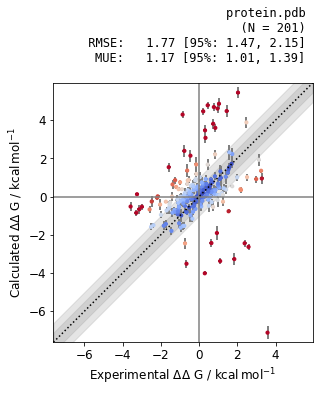

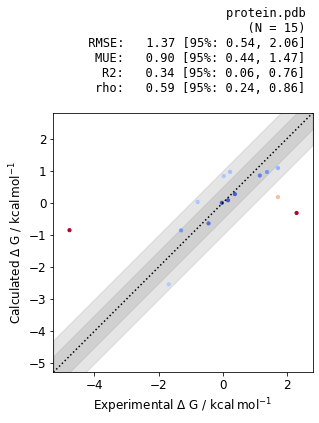

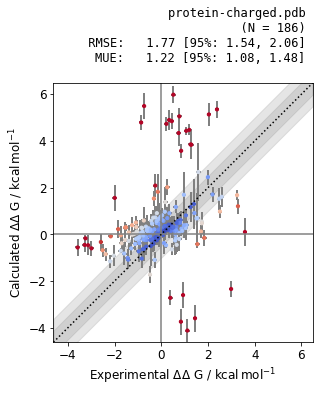

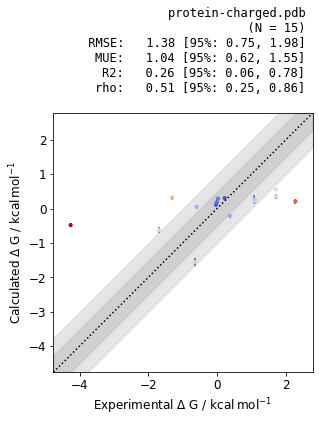

In [7]:
import networkx as nx
from freeenergyframework import plotting
graphs = {'protein.pdb':nx.DiGraph(), 'protein-charged.pdb':nx.DiGraph(),}
# g = nx.DiGraph()


### THESE ARE IC50s IN muM
### ALSO NEED TO CHECK THAT THE ORDER IS THE SAME AS IN THE LIGAND SDF FILE!!!!
SERIES_5_EXPT = [2.9,3.6,13.3,3.4,4.1,8.1,22.1,10.3,2.1,1.5,0.051,0.97,0.7,2,12.5]
indices = [10, 13, 8, 14, 11, 2, 0, 7, 4, 1, 12, 3, 5, 9, 6]
# 2.9,3.6,13.3,3.4,4.1,8.,22.1,10.3,2.1,1.5,0.051,0.97,0.7,12.5

for d in details.values():
    if 'complex_fes' in d and 'solvent_fes' in d:
        protein = d['protein'].lower()
        graph = graphs[f'{protein}']
        DDG = ((d['complex_fes'][0] - d['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole) 
        dDDG = ((d['solvent_fes'][1]**0.5 + d['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
        ### NEED TO CHECK CONVERSION FROM IC50s to DDGS!!!!!
        graph.add_edge(d['start'],d['end'],calc_DDG=DDG, calc_dDDG=dDDG,exp_DDG=0.59*np.log(SERIES_5_EXPT[indices[d['end']]] / SERIES_5_EXPT[indices[d['start']]]),exp_dDDG=0.1)

for protein in graphs.keys():
    g = graphs[protein]
    try:
        generate_absolute_values(g)
        plotting.plot_DDGs(g,title=f'{protein}')
        plotting.plot_DGs(g,title=f'{protein}')
    except IndexError:
        print(f'not enough results for {protein}')

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.

/Users/brucemah/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: DeprecationWarning:

object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.



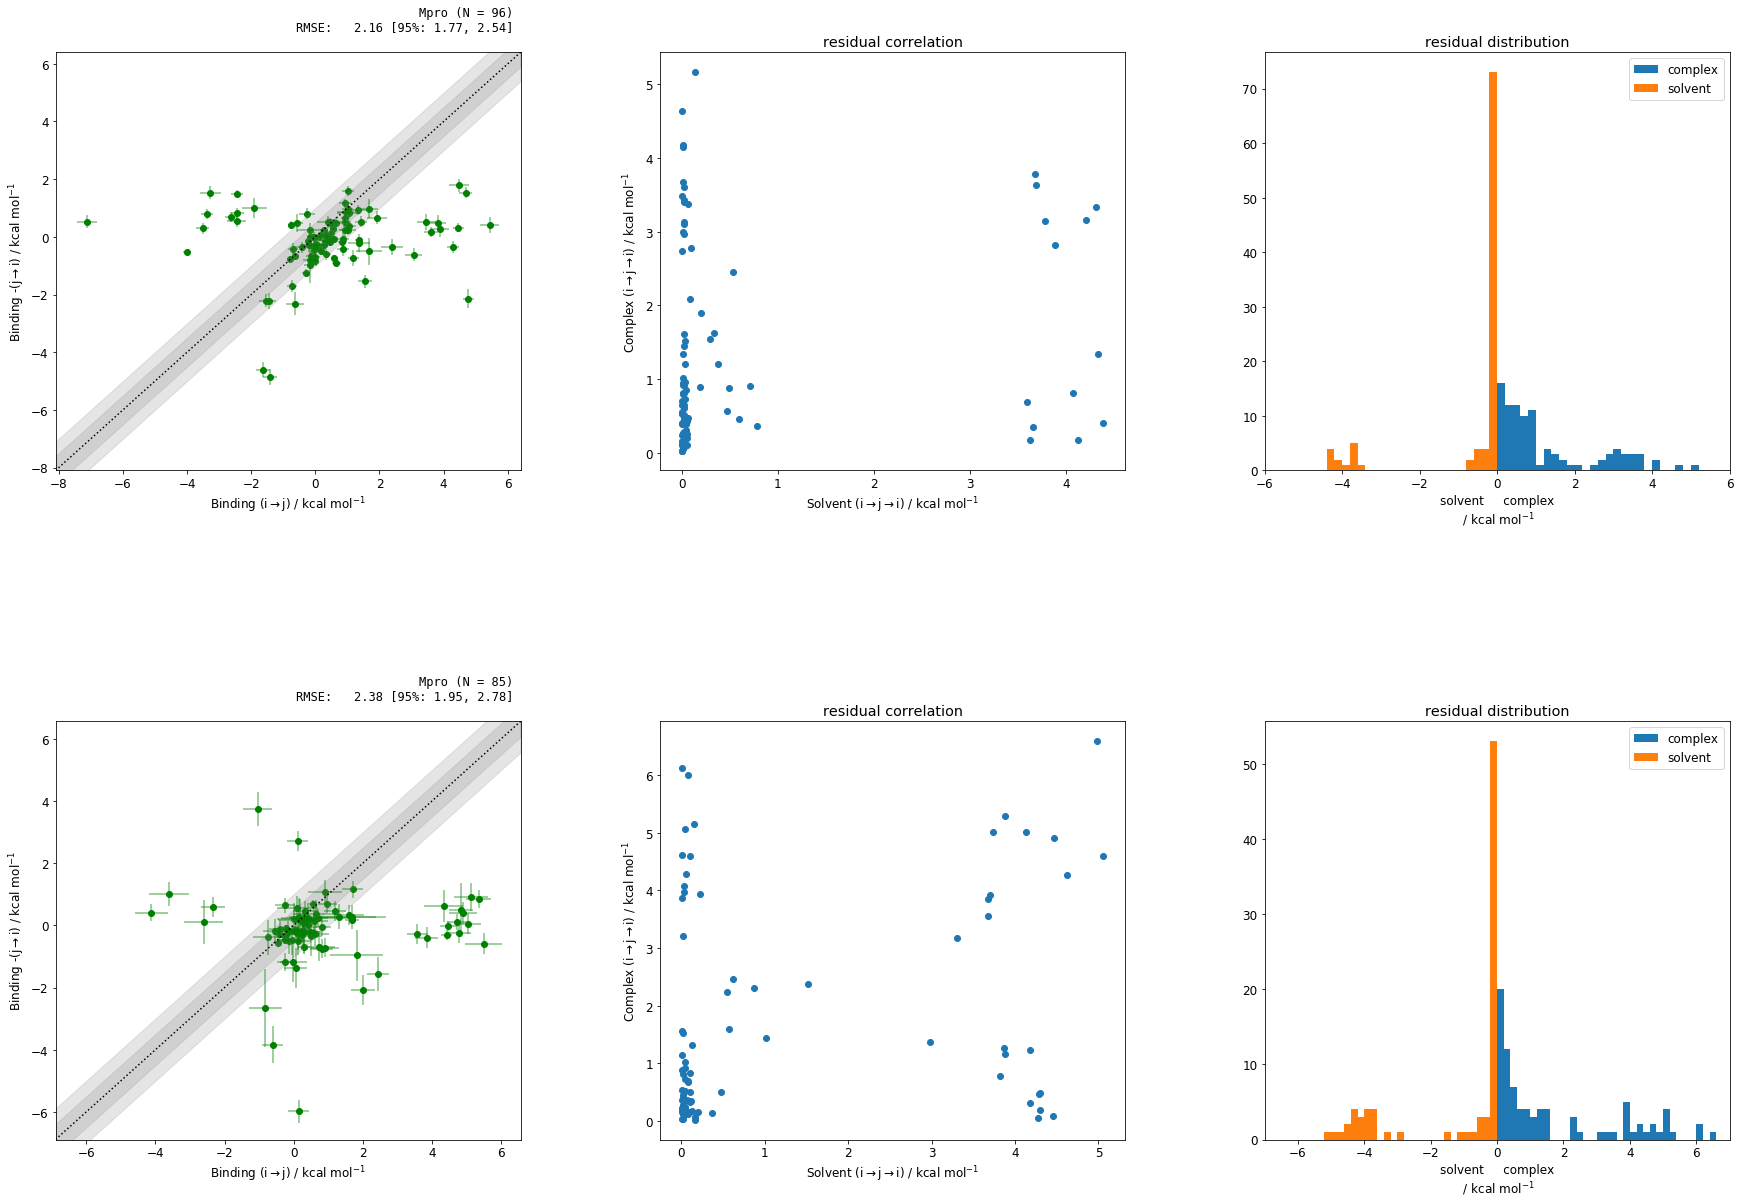

In [11]:
fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(30,20))
residuals = {}
consistency = {}
for p in graphs.keys():
    residuals[p] = {'complex':[],'solvent':[]}
    consistency[p] = {'x':[],'y':[],'xerr':[],'yerr':[]}

order = {}
for i, p in enumerate(graphs.keys()):
    order[p] = i

for i in range(1,420,2):
    f = details[str(i)]
    r = details[str(i+1)]
#     print(details[str(i)]['protein'])
    protein = details[str(i)]['protein']
    plt_id = order[protein]
    
    if 'complex_fes' in f and 'complex_fes' in r and 'solvent_fes' in f and 'solvent_fes' in r:
        f_binding = ((f['complex_fes'][0] - f['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
        f_binding_err = ((f['solvent_fes'][1]**0.5 + f['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
        r_binding = ((r['complex_fes'][0] - r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
        r_binding_err = ((r['solvent_fes'][1]**0.5 + r['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)

        consistency[protein]['x'].append(f_binding)
        consistency[protein]['y'].append(-r_binding)
        consistency[protein]['xerr'].append(f_binding_err)
        consistency[protein]['yerr'].append(r_binding_err)

        axes[plt_id][0].errorbar(f_binding,-r_binding,xerr=f_binding_err,yerr=r_binding_err,alpha=0.5,color='green')
        axes[plt_id][0].scatter(f_binding,-r_binding,color='green')

        residuals[protein]['complex'].append(np.abs(((f['complex_fes'][0] + r['complex_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)))
        residuals[protein]['solvent'].append(-np.abs(((f['solvent_fes'][0] + r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)))

for key,i in order.items():
    statistics_string = ''
    for statistic in ['RMSE']:
        s = stats.bootstrap_statistic(np.asarray(consistency[key]['x']),np.asarray(consistency[key]['y']), statistic=statistic)
        string = f"{statistic}:   {s['mle']:.2f} [95%: {s['low']:.2f}, {s['high']:.2f}] " + "\n"
        statistics_string += string

    long_title = f'Mpro (N = {len(np.asarray(consistency[key]["x"]))}) \n'+f'{statistics_string}'
    axes[i][0].set_title(long_title, fontsize=12, loc='right', horizontalalignment='right', family='monospace')
    axes[i][0].set_xlabel(r'Binding (i$\rightarrow$j) / kcal mol$^{-1}$')
    axes[i][0].set_ylabel(r'Binding -(j$\rightarrow$i) / kcal mol$^{-1}$')
    axes[i][1].scatter(-np.asarray(residuals[key]['solvent']),np.asarray(residuals[key]['complex']))
    axes[i][1].set_title('residual correlation') 
    axes[i][1].set_xlabel(r'Solvent (i$\rightarrow$j$\rightarrow$i) / kcal mol$^{-1}$') 
    axes[i][1].set_ylabel(r'Complex (i$\rightarrow$j$\rightarrow$i) / kcal mol$^{-1}$') 

    xlimit = axes[i][0].get_xlim()
    ylimit = axes[i][0].get_ylim()
    limit = (min([xlimit[0],ylimit[0]]),max([xlimit[1],ylimit[1]]))
    axes[i][0].plot(limit,limit, 'k:')
    small_dist = 0.5


    axes[i][0].fill_between(limit, [limit[0] - small_dist, limit[1] - small_dist],
                     [limit[0] + small_dist, limit[1] + small_dist],
                     color='grey', alpha=0.2)
    axes[i][0].fill_between(limit, [limit[0] - small_dist*2, limit[1] - small_dist*2],
                     [limit[0] + small_dist*2, limit[1] + small_dist*2],
                     color='grey', alpha=0.2)
    axes[i][0].set_xlim(limit)
    axes[i][0].set_ylim(limit)

    minimum = np.floor(min(residuals[key]['solvent']))
    maximum = np.ceil(max(residuals[key]['complex']))
    bins = np.linspace(minimum,maximum,5*(maximum-minimum)+1)
    axes[i][2].hist(residuals[key]['complex'],bins=bins,label='complex')
    axes[i][2].hist(residuals[key]['solvent'],bins=bins,label='solvent')    
    axes[i][2].legend()
    axes[i][2].set_xlabel('solvent     complex\n'+r' / kcal mol$^{-1}$') 
    axes[i][2].set_title('residual distribution') 
    xlim = max([-minimum,maximum])
    axes[i][2].set_xlim(-xlim, xlim)

plt.subplots_adjust(hspace = 0.6,wspace = 0.3)
plt.show()


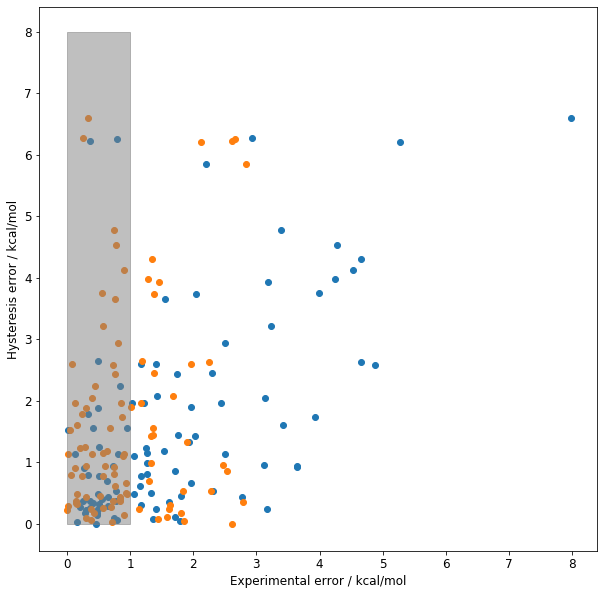

In [12]:
residuals = {}
consistency = {}

residuals['protein.pdb'] = {'agreement-f':[],'agreement-r':[],'hysteresis':[]}
consistency['protein.pdb'] = {'x':[],'y':[],'xerr':[],'yerr':[]}
protein = 'protein.pdb'
key = protein

plt.figure(figsize=(10,10))

for i in range(1,210,2):
    f = details[str(i)]
    r = details[str(i+1)]
#     if f['start'] in lig and f['end'] in lig:
    if 'complex_fes' in f and 'complex_fes' in r and 'solvent_fes' in f and 'solvent_fes' in r:
        f_binding = ((f['complex_fes'][0] - f['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
        f_binding_err = ((f['solvent_fes'][1]**0.5 + f['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)
        r_binding = ((r['complex_fes'][0] - r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole)
        r_binding_err = ((r['solvent_fes'][1]**0.5 + r['complex_fes'][1]**0.5)**2*kT).value_in_unit(unit.kilocalories_per_mole)

        
        
        expt = 0.59*np.log(SERIES_5_EXPT[f['end']] / SERIES_5_EXPT[f['start']])
        DDG = ((f['complex_fes'][0] - f['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole) 
        residuals[protein]['agreement-f'].append(np.abs((expt - DDG)))
        residuals[protein]['hysteresis'].append(np.abs((f_binding - r_binding)))

        DDG = ((-r['complex_fes'][0] + r['solvent_fes'][0])*kT).value_in_unit(unit.kilocalories_per_mole) 
        residuals[protein]['agreement-r'].append(np.abs((expt - DDG)))
        
plt.scatter(np.asarray(residuals[key]['agreement-f']),np.asarray(residuals[key]['hysteresis']))
plt.scatter(np.asarray(residuals[key]['agreement-r']),np.asarray(residuals[key]['hysteresis']))
# plt.scatter(np.asarray(residuals[key]['agreement-r']),np.asarray(residuals[key]['agreement-f']))

plt.xlabel(f'Experimental error / kcal/mol')
plt.ylabel(f'Hysteresis error / kcal/mol')
plt.fill_between([0,1],[8,8],color='gray',alpha=0.5)
plt.show()


Throwing away edges with large hysteresis

In [13]:
def _remove_hysteresis_edges_from_graph(g, threshold=1.):
    to_remove = []
    for edge in g.edges(data=True):
        if g.has_edge(edge[1],edge[0]):
            f = g.get_edge_data(edge[0],edge[1])
            r = g.get_edge_data(edge[1],edge[0])
            if np.abs(f['calc_DDG'] - r['calc_DDG']) > threshold:
                to_remove.append((edge[0],edge[1]))
                
    g.remove_edges_from(to_remove)
    print(f'Removing {len(to_remove)} forwards and backwards edges from graph')
    return g

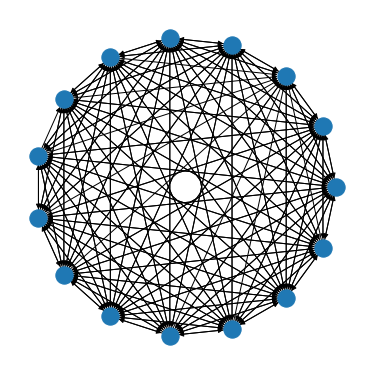

Removing 98 forwards and backwards edges from graph


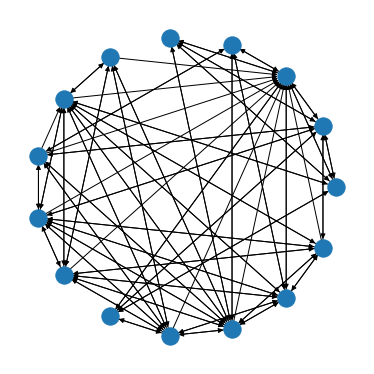

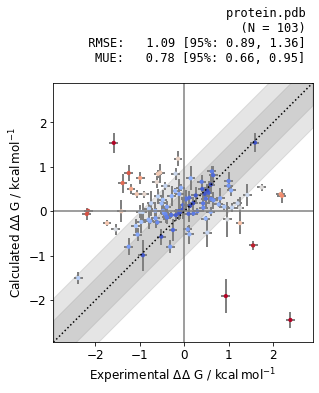

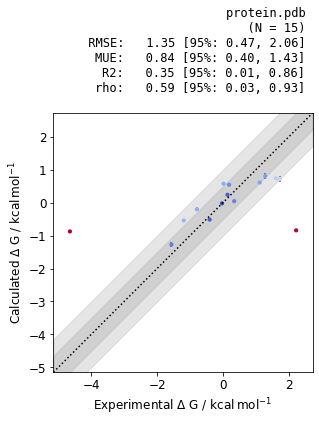

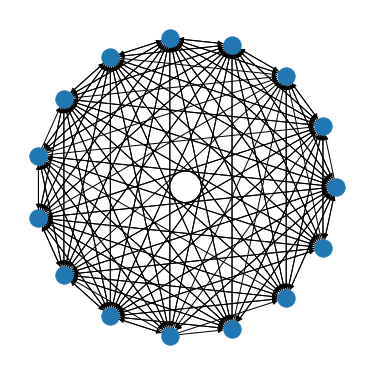

Removing 74 forwards and backwards edges from graph


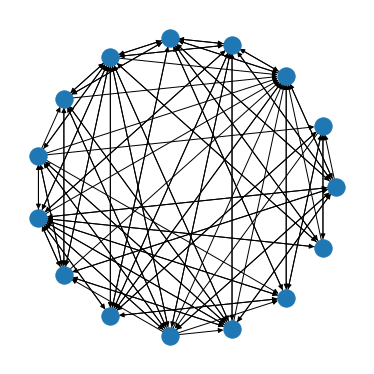

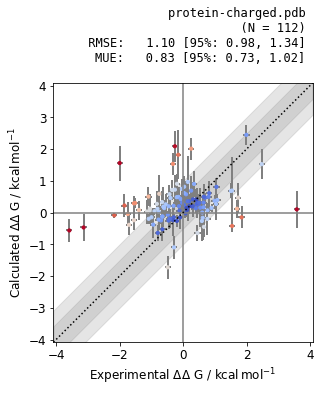

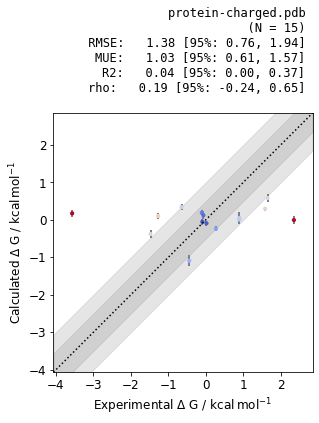

In [14]:
for protein in graphs.keys():
    g = graphs[protein]
    plt.figure(figsize=(5,5))
    nx.draw_circular(g)
    plt.show()
    g = _remove_hysteresis_edges_from_graph(g)
    plt.figure(figsize=(5,5))
    nx.draw_circular(g)
    plt.show()
    try:
        generate_absolute_values(g)
        plotting.plot_DDGs(g,title=f'{protein}')
        plotting.plot_DGs(g,title=f'{protein}')
    except IndexError:
        print(f'not enough results for {protein}')

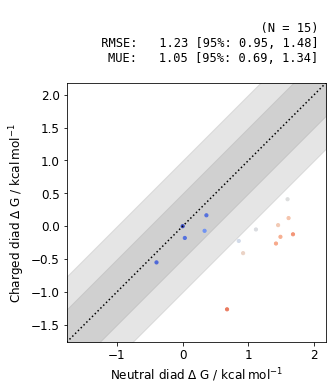

In [46]:
neutral = []
charged = []
for ligand in graphs['protein.pdb'].nodes(data=True):
    if graphs['protein-charged.pdb'].has_node(ligand[0]):
        neutral.append(ligand[1]['calc_DG'])
        charged.append(graphs['protein-charged.pdb'].nodes[ligand[0]]['calc_DG'])

plotting._master_plot(np.asarray(neutral), np.asarray(charged),quantity='$\\Delta$ G',
    xlabel='Neutral diad',
    ylabel='Charged diad',
    units='$\\mathrm{kcal\\,mol^{-1}}$',origins=False)
plt.show()